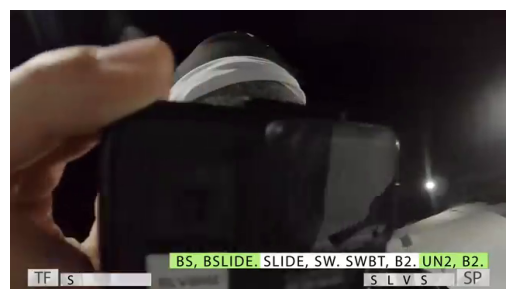

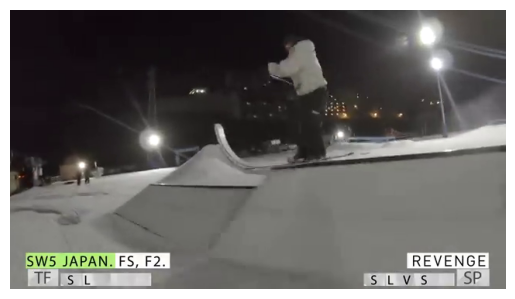

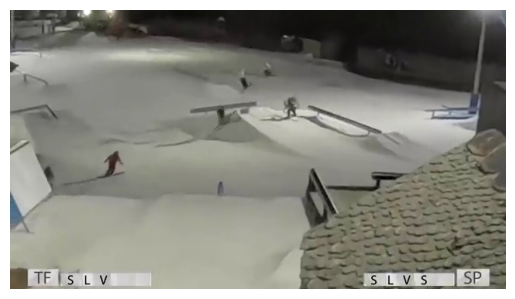

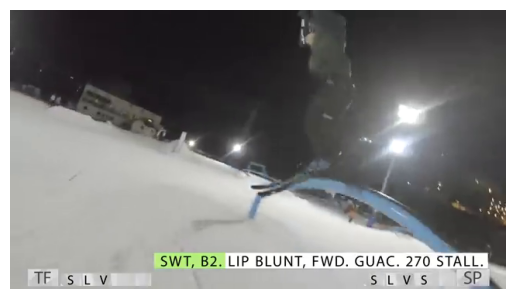

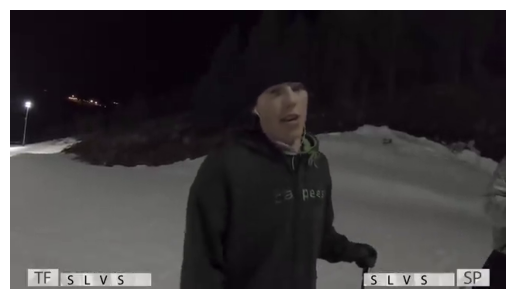

KeyboardInterrupt: Interrupted by user

In [10]:
import os
import cv2
import json
import matplotlib.pyplot as plt

# Directory containing the images
image_dir = os.path.join(os.path.dirname(os.path.abspath('')), 'slvsh-tr/slvsh_tr/assets/img')
tests_json_path = os.path.join(os.path.dirname(os.path.abspath('')), 'slvsh-tr/slvsh_tr/assets/examples.json')

# Get all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith('.png')]

# Sort the files to ensure consistent order
image_files.sort()

# Iterate through all images
with open(tests_json_path, 'r') as f:
    json_data = json.load(f)
existing = {d['image_path'] for d in json_data}

for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)
    if image_path in existing:
        continue
    
    # Open and display the image
    img = cv2.imread(image_path)
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.clf()
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    expected = input('Enter trick name')
    if expected == 'q':
        break
    obj = {
        "image_path": image_path,
        "expected": expected
    }
    json_data.append(obj)
    with open(tests_json_path, 'w') as f:
        json.dump(json_data, f, indent = 2)

